# Leaf image classification model

## Import LIbrary

In [1]:
import pandas as pd
import numpy as np
import pickle

from tensorflow.keras.models import load_model
from IPython.display import Image
from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

import matplotlib.pyplot as plt

## Import Data

In [2]:
with open ('x_train', 'rb') as fp:
    x_train = pickle.load(fp)
    
with open ('y_train', 'rb') as fp:
    y_train = pickle.load(fp)

### Convert  list `x_train` and `y_train` the sample into `np.array`

In [3]:
x_train = np.array(x_train)
y_train = np.array(y_train)

y_train = utils.to_categorical(y_train, 5)

## Model Training

In [6]:
# Initializing the Recurrent Neural Network
model = Sequential()

model.add(Dense(800, input_dim = 10000, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(5, activation = "softmax"))
#compile model
model.compile(loss = "categorical_crossentropy",
optimizer = "SGD", metrics = ["accuracy"])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 800)               8000800   
                                                                 
 dropout_1 (Dropout)         (None, 800)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 4005      
                                                                 
Total params: 8,004,805
Trainable params: 8,004,805
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
# fit model
model.fit(x_train,
          y_train,
          epochs=40,
          verbose=1)

Epoch 1/40
8/8 [==============================] - 1s 37ms/step - loss: 1.6343 - accuracy: 0.2696
Epoch 2/40
8/8 [==============================] - 0s 43ms/step - loss: 1.4442 - accuracy: 0.4043
Epoch 3/40
8/8 [==============================] - 0s 43ms/step - loss: 1.2291 - accuracy: 0.5043
Epoch 4/40
8/8 [==============================] - 0s 40ms/step - loss: 1.1410 - accuracy: 0.5522
Epoch 5/40
8/8 [==============================] - 0s 41ms/step - loss: 1.1711 - accuracy: 0.5435
Epoch 6/40
8/8 [==============================] - 0s 38ms/step - loss: 1.0360 - accuracy: 0.6391
Epoch 7/40
8/8 [==============================] - 0s 39ms/step - loss: 0.9566 - accuracy: 0.6565
Epoch 8/40
8/8 [==============================] - 0s 39ms/step - loss: 0.9183 - accuracy: 0.6696
Epoch 9/40
8/8 [==============================] - 0s 42ms/step - loss: 0.8625 - accuracy: 0.6957
Epoch 10/40
8/8 [==============================] - 0s 39ms/step - loss: 0.8475 - accuracy: 0.7348
Epoch 11/40
8/8 [============

## Save model

In [8]:
model.save("model.h5")

## Test model

In [14]:
SIZE = 100
# read from file
with open('class_name_dict', 'rb') as f:
    class_name = pickle.load(f)

In [15]:
model = load_model('model.h5')

In [16]:

def img_preprocessing (image_path):
    # transform the image into shades of gray and reduce the size = SIZE*SIZE
    img = image.load_img(image_path, target_size=(SIZE, SIZE), color_mode='grayscale')
    #convert the image into an array
    img_arr = image.img_to_array(img)
    #convert the shape of the array to a flat vector
    img_arr = img_arr.reshape(1, SIZE*SIZE)
    #invert the image
    img_arr = 255 - img_arr
    #normalize the image
    img_arr /= 255
    return img_arr

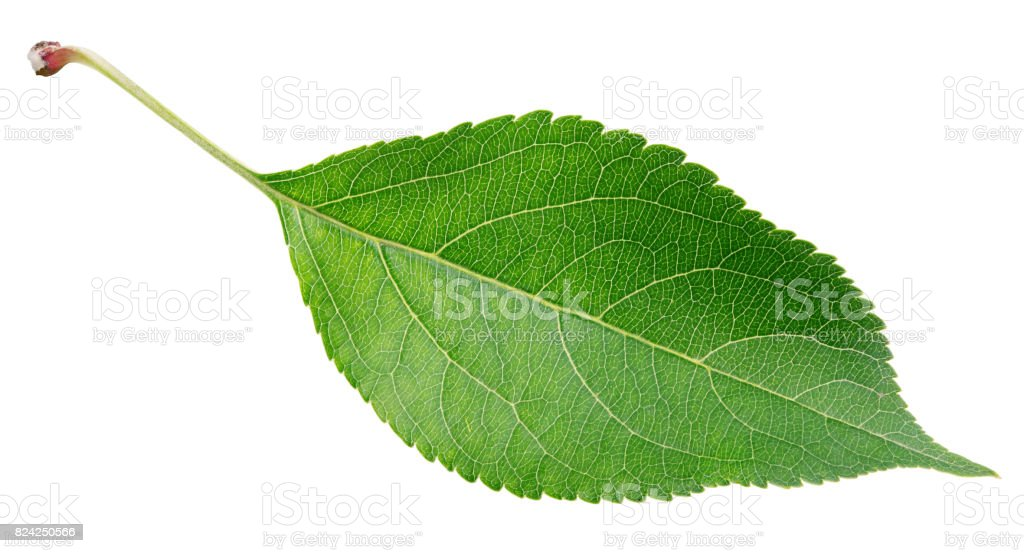

In [40]:
img_path = 'apple leaf.jpg'
Image(img_path)

In [41]:
img_test = img_preprocessing(img_path)
predictions = model.predict(img_test)

In [42]:
predictions

array([[0.907315  , 0.01850655, 0.02192737, 0.05071907, 0.00153196]],
      dtype=float32)

In [43]:
predictions.max()

0.907315

In [44]:
prediction = np.argmax(predictions)
print('Class number:', prediction)
print('Class name:', class_name[prediction])

Class number: 0
Class name: apple
